# Sugars in Mcdonald's menu items

I want to see how much is sugar presented in the different items of McDonald's menu.

In [27]:
#all the imports I need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from plotly.widgets import GraphWidget
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

First let's see how the data is formated

In [22]:
menu = pd.read_csv('./menu.csv')
menu.head(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15


Great, now let's only get the columns that we are interested in. Since I want to analyze the sugar in the menu's items, let's create a new DataFrame with the columns Item and Sugars: 

In [23]:
df_sugars = pd.DataFrame(columns=('Item','Sugars'))
df_sugars['Item'] = menu['Item']
df_sugars['Sugars'] = menu['Sugars']
print("Let's sort them by the amount of sugar they have in a ascending order: ")
df_sugars = df_sugars.sort_values('Sugars', ascending=[True])
print(df_sugars.head(10))


Let's sort them by the amount of sugar they have in a ascending order: 
                             Item  Sugars
145                Coffee (Small)       0
99              Kids French Fries       0
96             Small French Fries       0
81   Chicken McNuggets (20 piece)       0
114             Diet Coke (Small)       0
115            Diet Coke (Medium)       0
116             Diet Coke (Large)       0
117             Diet Coke (Child)       0
122        Diet Dr Pepper (Small)       0
123       Diet Dr Pepper (Medium)       0


Ok, great. So let's check which are the items that have 0 sugar in them:

In [24]:
print("Number of items in the menu: "+str(len(menu.index)))
print("Number of items without sugar in the menu: "+str(len(df_sugars.loc[df_sugars['Sugars'] == 0])))
print(df_sugars.loc[df_sugars['Sugars'] == 0])

Number of items in the menu: 260
Number of items without sugar in the menu: 25
                             Item  Sugars
145                Coffee (Small)       0
99              Kids French Fries       0
96             Small French Fries       0
81   Chicken McNuggets (20 piece)       0
114             Diet Coke (Small)       0
115            Diet Coke (Medium)       0
116             Diet Coke (Large)       0
117             Diet Coke (Child)       0
122        Diet Dr Pepper (Small)       0
123       Diet Dr Pepper (Medium)       0
124        Diet Dr Pepper (Large)       0
98             Large French Fries       0
80   Chicken McNuggets (10 piece)       0
79    Chicken McNuggets (6 piece)       0
136           Dasani Water Bottle       0
137              Iced Tea (Small)       0
138             Iced Tea (Medium)       0
139              Iced Tea (Large)       0
140              Iced Tea (Child)       0
78    Chicken McNuggets (4 piece)       0
146               Coffee (Medium)      

So only 25 elements of 260, which means that only the **9.61**% of the items in McDonalds doesn't have any amount of sugar. Now, let's do the plot to see this graphically.

In [18]:
print("Let's start with the bar chart")

data = [go.Bar(
             y = df_sugars['Sugars'].values,
            x = df_sugars['Item'].values,
    )]

py.iplot(data, filename='basic-bar')

Let's start with the bar chart


In [19]:
# Now let's plot a scatter plot
# This plot is based on the one made by Anisotropic:
# https://www.kaggle.com/arthurtok/super-sized-we-mcdonald-s-nutritional-metrics

trace = go.Scatter(
    y = df_sugars['Sugars'].values,
    x = df_sugars['Item'].values,
    mode='markers',
    marker=dict(
        size= df_sugars['Sugars'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = df_sugars['Sugars'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = menu['Item'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of Sugars per Item on the Menu',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Sugars(g)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterChol')

The OMS have said that the maxium amount of sugar for a person is 50g. Let's see how is the amount of sugar related with the items in the McDonald's menu:

In [33]:
# First let's add a new column to the dataframe, all equal to 50
df_sugars['Amount of Sugar recommended (g)'] = 50

# Let's plot them

trace1 = go.Bar(
    y = df_sugars['Sugars'].values,
    x = df_sugars['Item'].values,
    name='Sugars(g)'
)
trace2 = go.Bar(
    y = df_sugars['Amount of Sugar recommended (g)'].values,
    x = df_sugars['Item'].values,
    name='Recommended value of sugar OMS (g)'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

layout= go.Layout(
    autosize= True,
    title= 'Relation between OMSs recommendation and  Sugars per Item on the Menu',
    hovermode= 'closest',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Sugars(g)',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
graph = py.iplot(fig, filename='grouped-bar')

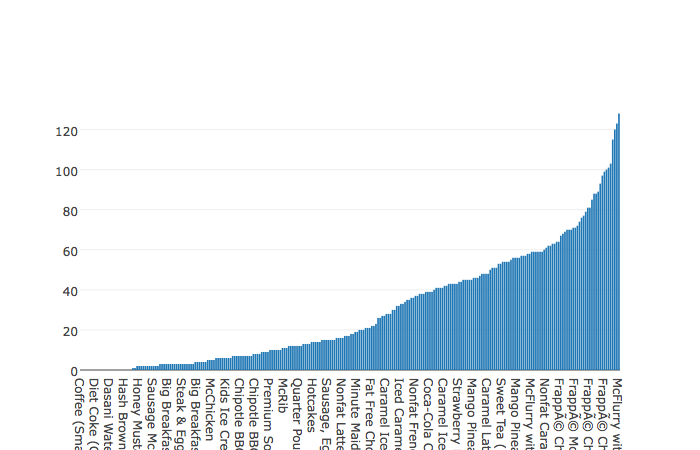

In [38]:
from IPython.display import Image
Image("img/barchart.png")


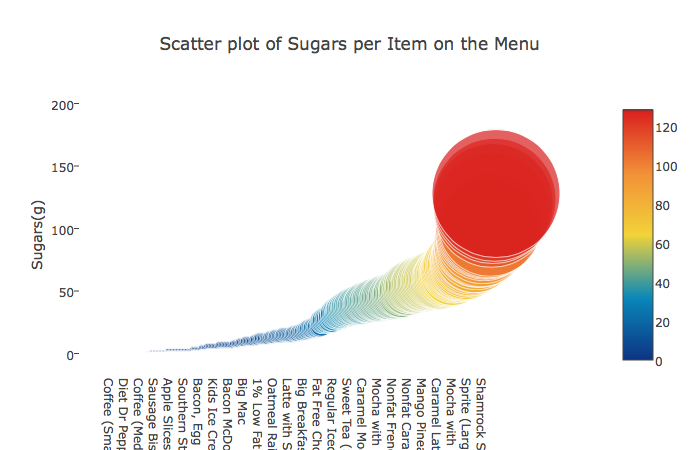

In [39]:
Image("img/scatterplot.png")


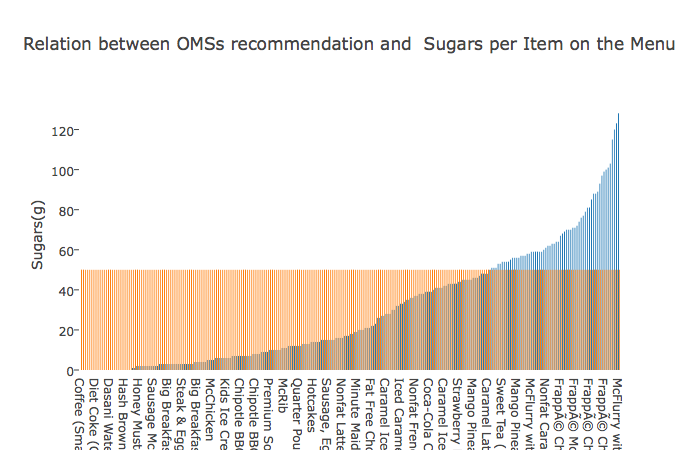

In [40]:
Image("img/relationoms.png")